In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

## Data loading and preprocessing

In [15]:
#trains = pd.read_csv("all_trains.csv").drop(["Name","State","Runtime"], axis=1)
trains = pd.read_csv("all_trains.csv")[['EMBEDDING', 'FRACTION', 'LEVEL', 'MERGE_METHOD', 'RANDOM_STATE',
       'SPLITTING', 'JOB_ID', 'epoch', 'learning rate', 'time', 'train loss',
       'train macro F1', 'train micro F1', 'val loss', 'val macro F1',
       'val micro F1']]
#tests = pd.read_csv("all_tests.csv").drop(["Name","State","Runtime"], axis=1)
tests = pd.read_csv("all_tests.csv")[['JOB_ID', 'test loss', 'test macro F1', 'test macro H', 'test micro F1']]
trains.columns

Index(['EMBEDDING', 'FRACTION', 'LEVEL', 'MERGE_METHOD', 'RANDOM_STATE',
       'SPLITTING', 'JOB_ID', 'epoch', 'learning rate', 'time', 'train loss',
       'train macro F1', 'train micro F1', 'val loss', 'val macro F1',
       'val micro F1'],
      dtype='object')

In [16]:
all = trains.join(tests.set_index(['JOB_ID']), on=['JOB_ID'], how="inner")
#all = all.loc[all["HIDDEN_SIZE"]==8192].drop("HIDDEN_SIZE", axis=1)
#all = trains.join(tests.set_index(['LEARNING_RATE','EMBEDDING', 'FRACTION', 'LEVEL', 'MERGE_METHOD', 'RANDOM_STATE','SPLITTING','HIDDEN_SIZE']), on=['LEARNING_RATE','EMBEDDING', 'FRACTION', 'LEVEL', 'MERGE_METHOD', 'RANDOM_STATE','SPLITTING','HIDDEN_SIZE'], how="inner")
#all = all.loc[all["HIDDEN_SIZE"]==8192].drop("HIDDEN_SIZE", axis=1)
#all = all.loc[all["LEARNING_RATE"]==1e-4].drop("LEARNING_RATE", axis=1)

In [17]:
progressives = all.loc[all["SPLITTING"]=="progressive"]
classics = all.drop(progressives.index)
print(len(progressives))
print(len(classics))

165
100


## Spatial and Species splitting results

In [18]:
classics.columns

Index(['EMBEDDING', 'FRACTION', 'LEVEL', 'MERGE_METHOD', 'RANDOM_STATE',
       'SPLITTING', 'JOB_ID', 'epoch', 'learning rate', 'time', 'train loss',
       'train macro F1', 'train micro F1', 'val loss', 'val macro F1',
       'val micro F1', 'test loss', 'test macro F1', 'test macro H',
       'test micro F1'],
      dtype='object')

In [19]:
classics.head(20)

,EMBEDDING,FRACTION,LEVEL,MERGE_METHOD,RANDOM_STATE,SPLITTING,JOB_ID,epoch,learning rate,time,train loss,train macro F1,train micro F1,val loss,val macro F1,val micro F1,test loss,test macro F1,test macro H,test micro F1
32,agnostic,40,L2,fusion,5,species,232,25,0.000001,89.137381,0.608313,0.233744,0.301585,0.921954,0.121846,0.209092,1.426657,0.137687,3.789720,0.177856
33,longformer,40,L2,selection,5,species,231,44,0.000001,115.776412,1.048242,0.121334,0.151120,0.985339,0.076777,0.109001,1.268525,0.102620,8.414921,0.136104
35,longformer,40,L2,fusion,5,species,230,39,0.000001,100.557616,0.846306,0.163347,0.209150,0.905097,0.109702,0.172535,1.145678,0.141953,5.813770,0.182033
36,doc2vec,40,L2,fusion,5,species,228,24,0.000002,60.891460,0.686737,0.217615,0.272797,0.878607,0.123842,0.216571,1.208392,0.172904,3.983080,0.228507
37,doc2vec,40,L2,selection,5,species,229,44,0.000001,110.678550,0.686337,0.205869,0.259472,0.882441,0.109269,0.184012,1.329083,0.135780,4.927956,0.196321
38,agnostic,40,L2,fusion,5,spatial,227,24,0.000001,85.319068,0.651538,0.233524,0.294877,0.952911,0.109018,0.181605,1.116847,0.119985,5.033452,0.186191
39,longformer,40,L2,selection,5,spatial,226,56,0.000001,140.055352,1.061523,0.126696,0.154503,1.049657,0.081194,0.117714,1.063197,0.083776,8.862634,0.112389
40,longformer,40,L2,fusion,5,spatial,225,40,0.000001,97.004415,0.797051,0.184754,0.229956,0.929418,0.102339,0.168391,1.063576,0.112605,5.298933,0.173176
41,longformer,40,L1,fusion,5,species,220,48,0.000001,127.348615,0.773066,0.376984,0.447511,0.830974,0.239089,0.363488,1.131102,0.280137,2.120196,0.360518
42,longformer,40,L1,selection,5,species,221,30,0.000001,80.993452,1.013558,0.279308,0.339309,0.914231,0.203352,0.274173,1.168168,0.218949,2.950088,0.278382


In [20]:
performance = classics.drop(["FRACTION","train loss","train macro F1","train micro F1","val loss","val macro F1","val micro F1","test loss"], axis=1)
performance.loc[performance["EMBEDDING"]=="agnostic","MERGE_METHOD"] = "none"

performance.loc[(performance["EMBEDDING"]=="doc2vec") & (performance["MERGE_METHOD"]=="fusion"),"MERGE_METHOD"] = "max pooling and norm"
performance.loc[(performance["EMBEDDING"]=="longformer") & (performance["MERGE_METHOD"]=="fusion"),"MERGE_METHOD"] = "max pooling"

#performance = performance.drop(performance.loc[(performance["EMBEDDING"]=="doc2vec") & (performance["MERGE_METHOD"]=="selection")].index)

#performance.loc[performance["LEVEL"]=="L1","test macro H"] *= 9
#performance.loc[performance["LEVEL"]=="L2","test macro H"] *= 32
## Results in percent
#performance[["test macro F1","test micro F1"]] = (performance[["test macro F1","test micro F1"]]*100)



for level in "L2","L1":
    subperformance = performance[performance["LEVEL"]==level]
    subperformance = subperformance.groupby(["LEVEL", "SPLITTING","EMBEDDING", "MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std'])#.round(decimals=3)
    subperformance = subperformance.rename(columns={"test macro F1":"macro F1 score","test micro F1":"micro F1 score","test macro H":"Hamming distance"})
    subperformance = subperformance.reset_index()
    subperformance = subperformance.rename(columns={"LEVEL":"level","SPLITTING":"splitting","EMBEDDING":"text embedding","MERGE_METHOD":"joint embedding"})
    subperformance = subperformance.set_index(["level","splitting","text embedding","joint embedding"]).round(4)
    """subperformance = subperformance.style.format({
        'macro F1 score': '{:.2%}'.format,
        'micro F1 score': '{:.2%}'.format,
        'Hamming distance': '{:.3E}'.format,
    })"""
    subperformance.to_latex(f"performance_{level}.tex")
    subperformance.to_csv(f"performance_{level}.csv")
#performance.to_latex("performance.tex")
subperformance

/tmp/ipykernel_1199070/1421774808.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subperformance = subperformance.groupby(["LEVEL", "SPLITTING","EMBEDDING", "MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std'])#.round(decimals=3)
/tmp/ipykernel_1199070/1421774808.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  subperformance.to_latex(f"performance_{level}.tex")
/tmp/ipykernel_1199070/1421774808.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subperformance = subperformance.groupby(["LEVEL", "SPLITTING","EMBEDDING", "ME

macro F1 score          \
                                                              mean     std   
level splitting text embedding joint embedding                               
L1    spatial   agnostic       none                         0.2628  0.0014   
                doc2vec        max pooling and norm         0.2721  0.0032   
                               selection                    0.2589  0.0014   
                longformer     max pooling                  0.2534  0.0032   
                               selection                    0.2058  0.0014   
      species   agnostic       none                         0.2382  0.0058   
                doc2vec        max pooling and norm         0.2988  0.0042   
                               selection                    0.2545  0.0045   
                longformer     max pooling                  0.2791  0.0051   
                               selection                    0.2195  0.0024   

                                                    micro F1 score          \
                                                              mean     std   
level splitting text embedding joint embedding                               
L1    spatial   agnostic       none                         0.3805  0.0044   
                doc2vec        max pooling and norm         0.3819  0.0063   
                               selection                    0.3576  0.0012   
                longformer     max pooling                  0.3476  0.0047   
                               selection                    0.2742  0.0056   
      species   agnostic       none                         0.2717  0.0074   
                doc2vec        max pooling and norm         0.3797  0.0210   
                               selection                    0.3491  0.0106   
                longformer     max pooling                  0.3571  0.0152   
                               selection                    0.2770  0.0062   

                                                    Hamming distance          
                                                                mean     std  
level splitting text embedding joint embedding                                
L1    spatial   agnostic       none                           1.9224  0.0546  
                doc2vec        max pooling and norm           1.7862  0.0361  
                               selection                      2.1512  0.0297  
                longformer     max pooling                    2.0894  0.0361  
                               selection                      2.9557  0.0900  
      species   agnostic       none                           1.7587  0.1215  
                doc2vec        max pooling and norm           1.6705  0.0831  
                               selection                      2.0499  0.0771  
                longformer     max pooling                    2.1114  0.0779  
                               selection                      3.0122  0.1430

## Progressive splitting results

In [21]:
splits_stats = pd.read_json("/data/nicola/WSH/progressive_splits_stats.json", orient="records")
splits_stats["frac"] = splits_stats["frac"].apply(lambda x : int(100*x))
splits_stats.head()

,random_state,frac,species_inter,species_union,train_species,test_species
0,1,0,0,3308,1816,1492
1,1,10,554,3320,2382,1492
2,1,20,763,3341,2612,1492
3,1,30,874,3343,2725,1492
4,1,40,946,3350,2804,1492


In [22]:
progressives = progressives.join(splits_stats.set_index(["frac","random_state"]), how="inner", on=["FRACTION","RANDOM_STATE"]).drop(["train loss","train macro F1","train micro F1","val loss","val macro F1","val micro F1","test loss"], axis=1)

In [23]:
progressives["iou"] = (progressives["species_inter"]/progressives["species_union"]).apply(lambda x : round(x,2))
progressives["iot"] = (progressives["species_inter"]/progressives["test_species"]).apply(lambda x : round(x,2))

/tmp/ipykernel_1199070/2829309339.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
/tmp/ipykernel_1199070/2829309339.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
/tmp/ipykernel_1199070/2829309339.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()


/tmp/ipykernel_1199070/2829309339.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
/tmp/ipykernel_1199070/2829309339.py:20: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
/tmp/ipykernel_1199070/2829309339.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
/tmp/ipykernel_1199070/2829309339.py:11: FutureWa

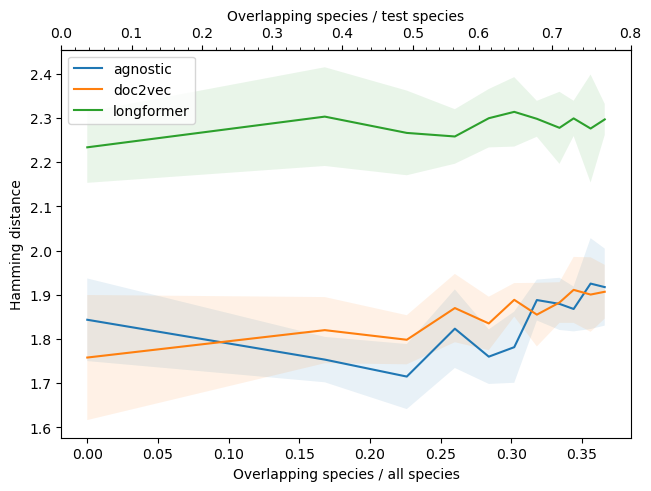

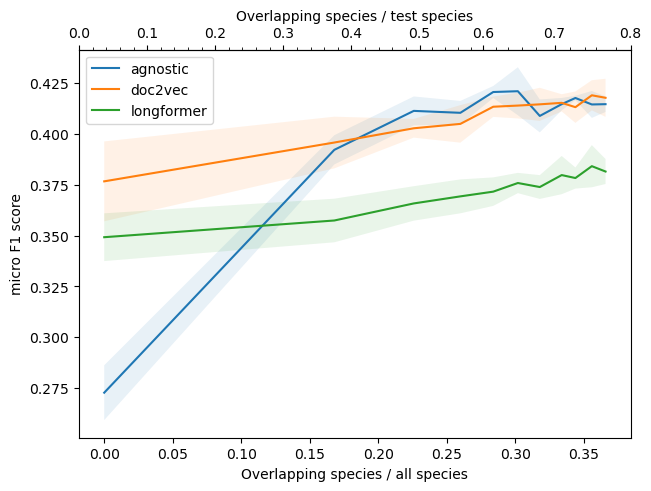

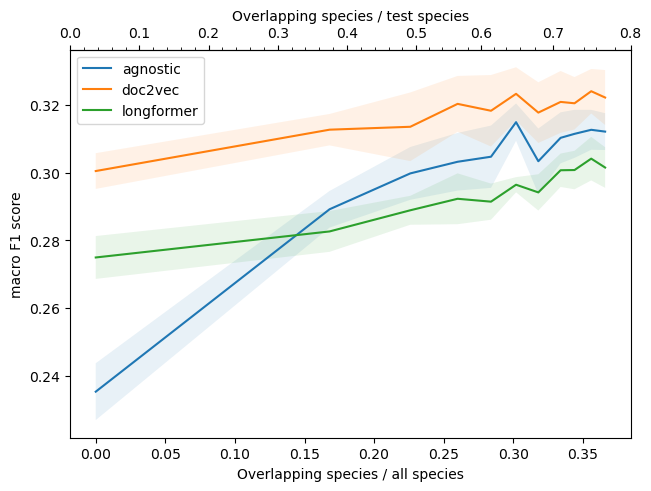

In [24]:
nice_metrics_names = {"test macro F1":"macro F1 score","test micro F1":"micro F1 score","test macro H":"Hamming distance"}
for metric in ["test macro H", "test micro F1", "test macro F1"]:
    x_value = "iou"
    second_x_value = "iot"
    alpha = 0.1
    fig, ax = plt.subplots(layout='constrained')
    subdf = progressives.loc[progressives["EMBEDDING"]=="agnostic"].sort_values(by=x_value, ascending=True)
    x_data = subdf[x_value].values
    x_data = x_data.reshape((11,5)).mean(axis=1)
    subdf["new_x"] = x_data.repeat(repeats=5, axis=0)
    subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
    y_data = subdf[metric]["mean"].values
    y_ci = subdf[metric]["std"].values
    ax.plot(x_data, y_data, label="agnostic")
    ax.fill_between(x_data, (y_data-y_ci), (y_data+y_ci), alpha=alpha)


    subdf = progressives.loc[progressives["EMBEDDING"]=="doc2vec"].loc[progressives["MERGE_METHOD"]=="fusion"].sort_values(by=x_value, ascending=True)
    subdf["new_x"] = x_data.repeat(repeats=5, axis=0)
    subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
    y_data = subdf[metric]["mean"].values
    y_ci = subdf[metric]["std"].values
    ax.plot(x_data, y_data, label="doc2vec")
    ax.fill_between(x_data, (y_data-y_ci), (y_data+y_ci), alpha=alpha)

    subdf = progressives.loc[progressives["EMBEDDING"]=="longformer"].loc[progressives["MERGE_METHOD"]=="fusion"].sort_values(by=x_value, ascending=True)
    subdf["new_x"] = x_data.repeat(repeats=5, axis=0)
    subdf = subdf.groupby(["new_x","EMBEDDING","MERGE_METHOD"])["test macro F1","test micro F1","test macro H"].aggregate(['mean', 'std']).reset_index()
    y_data = subdf[metric]["mean"].values
    y_ci = subdf[metric]["std"].values
    ax.plot(x_data, y_data, label="longformer")
    ax.fill_between(x_data, (y_data-y_ci), (y_data+y_ci), alpha=alpha)

    subdf = progressives.loc[progressives["EMBEDDING"]=="agnostic"].sort_values(by=x_value, ascending=True)
    temp = subdf[[x_value,second_x_value]].sort_values(by="iou")
    xold = temp[x_value].values.reshape((11,5)).mean(axis=1)
    xnew = temp[second_x_value].values.reshape((11,5)).mean(axis=1)

    ax.set_xlabel('Overlapping species / all species')
    ax.legend()

    def forward(x):
        return np.interp(x, xold, xnew)
    def inverse(x):
        return np.interp(x, xnew, xold)

    secax = ax.secondary_xaxis('top', functions=(forward, inverse))
    secax.xaxis.set_minor_locator(AutoMinorLocator())
    secax.set_xlabel('Overlapping species / test species')
    nice_name = nice_metrics_names[metric]
    plt.ylabel(nice_name)
    plt.savefig(f"progressive_{nice_name.replace(' ','_')}.png")

In [25]:
## Classwise scores
agno = pd.read_csv("agnostic_f1s.csv")
doc = pd.read_csv("doc2vec_f1s.csv")

In [31]:
doc.values.shape

(15, 9)

In [38]:
doc_scores = np.zeros((3,9))
for i in range(5):
    doc_scores += doc.values[3*i:3*i+3,:]
doc_scores = doc_scores/5
agno_scores = np.zeros((3,9))
for i in range(5):
    agno_scores += agno.values[3*i:3*i+3,:]
agno_scores = agno_scores/5

In [39]:
pd.DataFrame(doc_scores)

,0,1,2,3,4,5,6,7,8
0,0.221149,0.161948,0.326739,0.509158,0.326481,0.428489,0.234428,0.194789,0.286005
1,0.174807,0.159603,0.243360,0.538272,0.276040,0.423538,0.168571,0.141542,0.220975
2,0.302902,0.165381,0.498292,0.491961,0.403071,0.436814,0.395438,0.323121,0.415663


In [40]:
pd.DataFrame(agno_scores)

,0,1,2,3,4,5,6,7,8
0,0.216107,0.165643,0.258933,0.308060,0.287989,0.328751,0.164966,0.148861,0.264919
1,0.146877,0.108086,0.199650,0.506025,0.210067,0.379678,0.156318,0.136095,0.193219
2,0.410237,0.355545,0.397487,0.225587,0.470526,0.291142,0.174810,0.165093,0.443582
